In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electricity-cost-prediction-dataset/electricity_cost_dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/electricity-cost-prediction-dataset/electricity_cost_dataset.csv')

In [3]:
df.shape

(10000, 9)

In [4]:
df.isnull().sum()

site area               0
structure type          0
water consumption       0
recycling rate          0
utilisation rate        0
air qality index        0
issue reolution time    0
resident count          0
electricity cost        0
dtype: int64

In [5]:
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [13]:
df=df.drop(columns=['site area','structure type'])

In [14]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
X=df.drop(columns=['utilisation rate','issue reolution time'])

In [18]:
y

0       1420.0
1       3298.0
2       3115.0
3       1575.0
4       4301.0
         ...  
9995     885.0
9996    3081.0
9997    3325.0
9998    2892.0
9999    2603.0
Name: electricity cost, Length: 10000, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred=lr.predict(X_test)
y_pred

array([2704., 3614., 1455., ..., 1512., 3854., 4591.])

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MSE",mean_squared_error(y_pred,y_test))
print("MAE",mean_absolute_error(y_pred,y_test))
print("R2 Score ",r2_score(y_pred,y_test))

MSE 2.3007899491191754e-25
MAE 3.121272129646968e-13
R2 Score  1.0


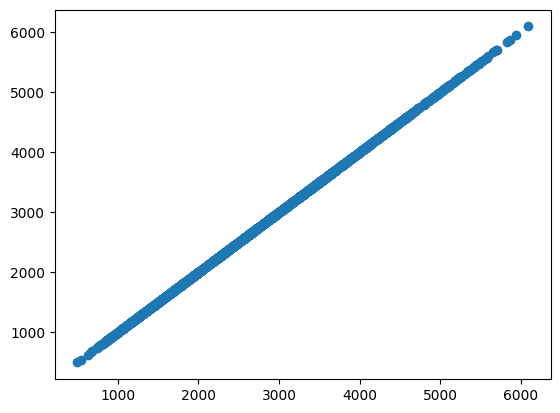

In [52]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.show()